In [1]:
#Importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
#Reading the dataset and checking the head of it
data = pd.read_csv("insurance.csv")
data.head(7)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59


In [3]:
#Checking the statistics of dataset
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
expenses    1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [5]:
#Checking Statistics of categorical features
data.describe(include=['O'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [6]:
#Shape of dataset - 1338 rows, 7 features
data.shape

(1338, 7)

In [7]:
#Checking value counts of region
data.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

# Check null values in dataset

In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

# Outlier Detection using IQR

In [9]:
# Outlier Observation Analysis
for feature in data[['age','bmi', 'expenses']]:
    
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if data[(data[feature] > upper)].any(axis=None) or data[(data[feature] < lower)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

age no
bmi yes
expenses yes


F:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


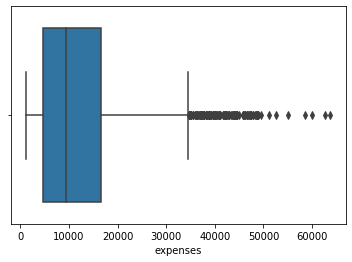

In [10]:
#Visualizing outliers using Boxplot
sb.boxplot(data['expenses'])

F:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


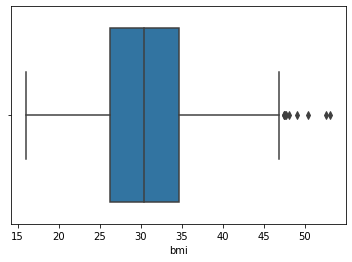

In [11]:
sb.boxplot(data['bmi'])

# Exploratory Data Analysis

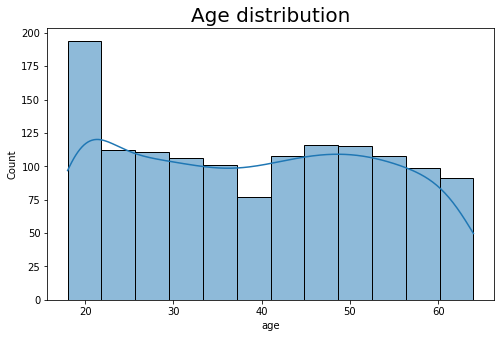

In [12]:
# Histogram plot of Age:
plt.figure(figsize=(8,5))
sb.histplot(data['age'],kde=True)
plt.title('Age distribution', fontsize=20)
plt.show()

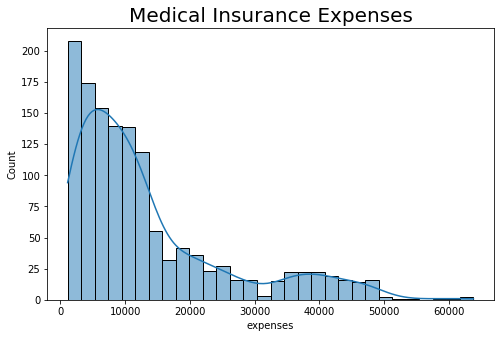

In [13]:
# Histogram plot of Medical Insurance Expenses:
plt.figure(figsize=(8,5))
sb.histplot(data['expenses'],kde=True)
plt.title('Medical Insurance Expenses', fontsize=20)  #Most of the data is left-skewed
plt.show()

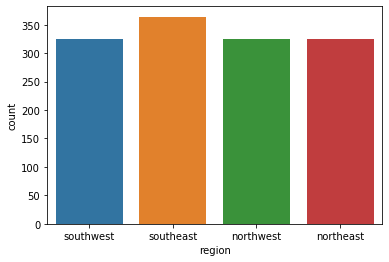

In [15]:
#Visualizing region using countplot
sb.countplot(x="region",data=data)

F:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


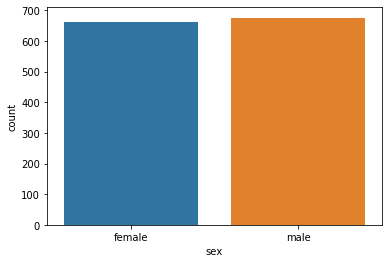

In [16]:
#Visualing value count of gender
sb.countplot(data['sex'])

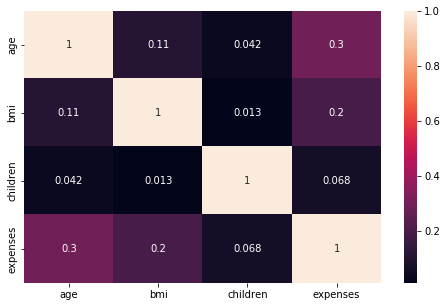

In [17]:
#Visualing correlation between features and target using heatmap
fig = plt.figure(figsize = (8,5))
sb.heatmap(data.corr(),annot=True)
#We found that age and bmi have some correlation with expenses, and age and bmi has very less correlation, there is no problem of multicollinearity

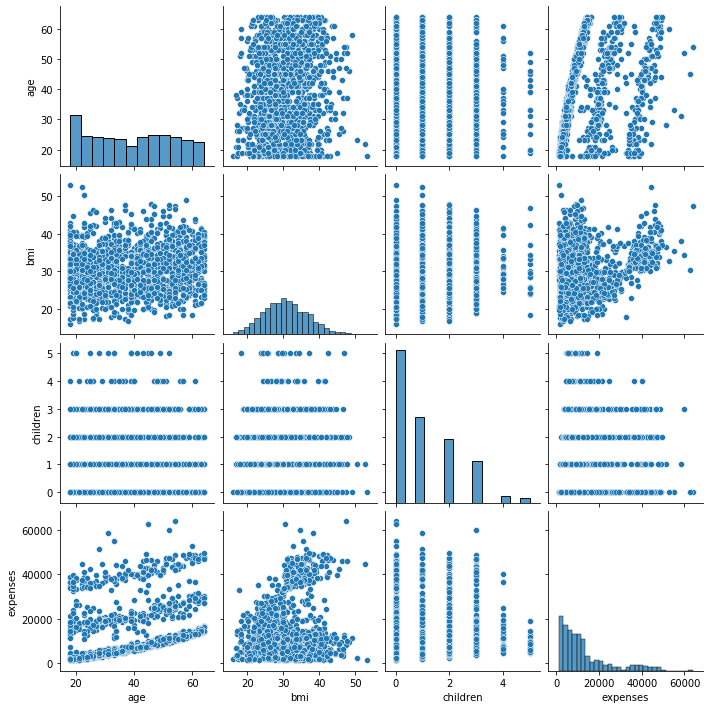

In [18]:
sb.pairplot(data)

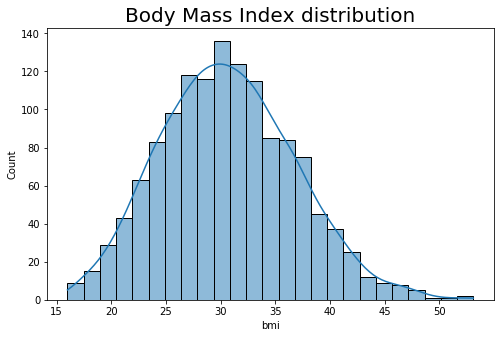

In [19]:
# Histogram plot of BMI:
plt.figure(figsize=(8,5))
sb.histplot(data['bmi'],kde=True)
plt.title('Body Mass Index distribution', fontsize=20)
plt.show()

F:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Smoker distribution')

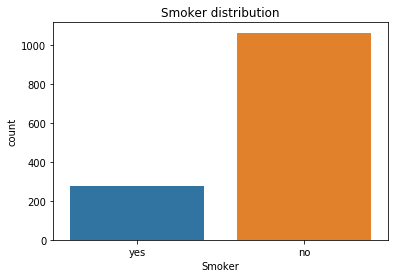

In [20]:
#Visualing smokers using countplot
sb.countplot(data['smoker'])
plt.xlabel("Smoker")
plt.title("Smoker distribution")

# Encoding Categotical columns using One hot encoding

In [21]:
#Converting (encoding) categorical features to continous features using One-hot encoding 
data = pd.get_dummies(data,drop_first=True)
data.head(7)

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0
5,31,25.7,0,3756.62,0,0,0,1,0
6,46,33.4,1,8240.59,0,0,0,1,0


# Model Building

In [22]:
#Model Building
X = data.drop(columns=['expenses'],axis=1)
Y = data['expenses']

In [23]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,0,1,0,0,1
1,18,33.8,1,1,0,0,1,0
2,28,33.0,3,1,0,0,1,0
3,33,22.7,0,1,0,1,0,0
4,32,28.9,0,1,0,1,0,0


In [25]:
#Dividing data into training and testing set
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state = 42)

# Linear Regression

In [26]:
#Linear Regression
Linear = LinearRegression()
Linear = Linear.fit(xtrain,ytrain)

#Predictions
prediction = Linear.predict(xtest)
#Testing, mean absolute error and r2 score
from sklearn.metrics import mean_absolute_error, r2_score
print("MAE - ",mean_absolute_error(ytest,prediction))
print("R2 Score - ",r2_score(ytest,prediction))

MAE -  4181.561524000788
R2 Score -  0.7835726930039906


# Decision Tree Regressor 

In [27]:
#Decision tree regression
DTR = DecisionTreeRegressor()
DTR = DTR.fit(xtrain,ytrain)
#predictions
prediction1 = DTR.predict(xtest)
print("MAE - ",mean_absolute_error(ytest,prediction1))
print("R2 Score - ",r2_score(ytest,prediction1))

MAE -  3285.8583208955224
R2 Score -  0.7136325588869781


# Random Forest Regressor

In [49]:
#Random Forest Regression
RandomForest = RandomForestRegressor(max_depth=100,max_features=3,min_samples_leaf=3,min_samples_split=10,n_estimators=200)
RandomForest = RandomForest.fit(xtrain, ytrain)

# Prediction:
prediction2 = RandomForest.predict(xtest)

# Scores:
print("R2 Score - ",r2_score(ytest, prediction2))
print("MAE - ",mean_absolute_error(ytest, prediction2))

R2 Score -  0.8703314576940446
MAE -  2755.572937313758


<BarContainer object of 8 artists>

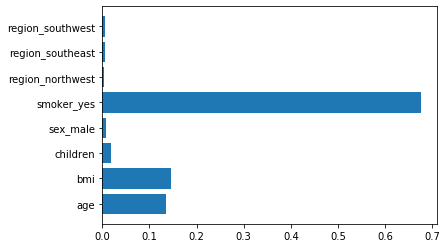

In [50]:
#Checking best features in the model
plt.barh(X.columns,RandomForest.feature_importances_)

We found that people who smoke, age and bmi are the most important features to decide the amount of cost a medical insurance will have for a person.

In [51]:
# Creating a pickle file for the classifier
import pickle
filename = 'MedicalInsurance.pkl'
pickle.dump(RandomForest, open(filename, 'wb'))